###Importing libraries

In [ ]:
import numpy as np
import pandas as pd

### Importing dataset




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/sentiment analysis
!ls

/content/drive/MyDrive/sentiment analysis
a1_RestaurantReviews_HistoricDump.tsv  c1_BoW_Sentiment_Model.pkl
a2_RestaurantReviews_FreshDump.tsv     c2_Classifier_Sentiment_Model
b1_Sentiment_Analysis_Model.ipynb      c3_Predicted_Sentiments_Fresh_Dump.gsheet
b2_Sentiment_Predictor.ipynb	       c3_Predicted_Sentiments_Fresh_Dump.tsv


In [ ]:
dataset = pd.read_csv('a1_RestaurantReviews_HistoricDump.tsv', delimiter = '\t', quoting = 3)

In [ ]:
dataset.shape

(900, 2)

In [ ]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
dataset['Liked'].value_counts()

1    496
0    404
Name: Liked, dtype: int64

In [ ]:
dataset['Liked'].value_counts()

1    496
0    404
Name: Liked, dtype: int64

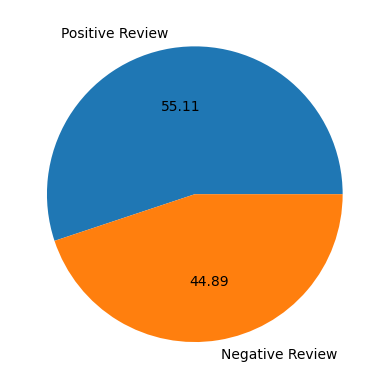

In [ ]:
import matplotlib.pyplot as plt
plt.pie(dataset['Liked'].value_counts(), labels=['Positive Review','Negative Review'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
dataset['num_characters'] = dataset['Review'].apply(len)


In [ ]:
dataset.head()

,Review,Liked,num_characters
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [ ]:
dataset['num_words'] = dataset['Review'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
dataset.head()

,Review,Liked,num_characters,num_words
0,Wow... Loved this place.,1,24,6
1,Crust is not good.,0,18,5
2,Not tasty and the texture was just nasty.,0,41,9
3,Stopped by during the late May bank holiday of...,1,87,16
4,The selection on the menu was great and so wer...,1,59,13


In [ ]:
dataset['num_sentences'] = dataset['Review'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [ ]:
dataset.head()

,Review,Liked,num_characters,num_words,num_sentences
0,Wow... Loved this place.,1,24,6,2
1,Crust is not good.,0,18,5,1
2,Not tasty and the texture was just nasty.,0,41,9,1
3,Stopped by during the late May bank holiday of...,1,87,16,1
4,The selection on the menu was great and so wer...,1,59,13,1


In [ ]:
dataset[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,900.000000,900.000000,900.000000
mean,57.744444,12.580000,1.041111
std,32.284215,6.758445,0.204180
min,11.000000,3.000000,1.000000
25%,32.000000,7.000000,1.000000
50%,51.000000,11.000000,1.000000
75%,78.000000,17.000000,1.000000
max,150.000000,42.000000,3.000000


In [ ]:
dataset[dataset['Liked'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,404.000000,404.000000,404.000000
mean,60.094059,13.262376,1.032178
std,34.488766,7.246491,0.176692
min,11.000000,3.000000,1.000000
25%,32.000000,7.000000,1.000000
50%,52.000000,12.000000,1.000000
75%,83.000000,18.000000,1.000000
max,150.000000,42.000000,2.000000


In [ ]:
dataset[dataset['Liked'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,496.000000,496.000000,496.000000
mean,55.830645,12.024194,1.048387
std,30.271358,6.286061,0.224007
min,11.000000,3.000000,1.000000
25%,32.000000,7.000000,1.000000
50%,49.000000,11.000000,1.000000
75%,73.250000,16.000000,1.000000
max,148.000000,33.000000,3.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

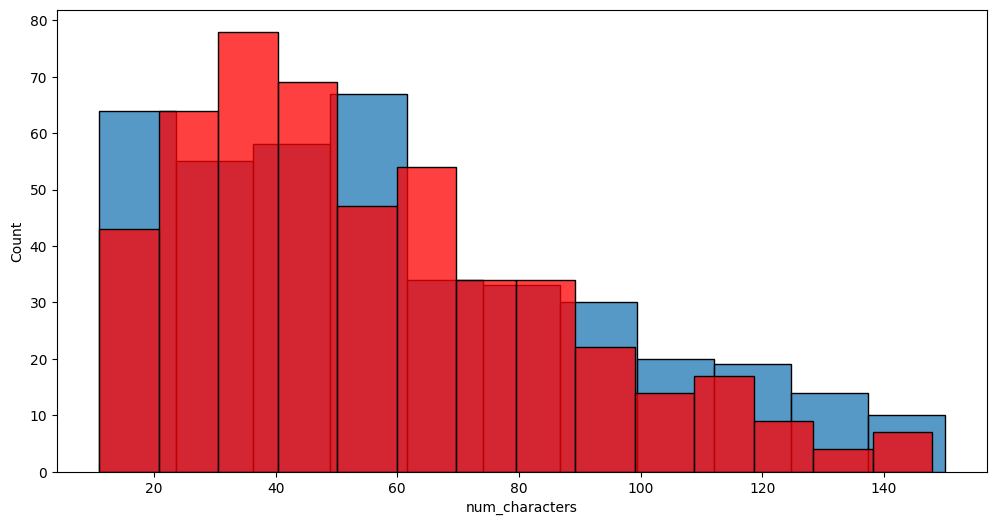

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['Liked'] == 0]['num_characters'])
sns.histplot(dataset[dataset['Liked'] == 1]['num_characters'],color='red')


### Data Preprocessing

In [ ]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]

for i in range(0, 900):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

### Data transformation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [ ]:
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [ ]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = 'c1_BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

### Dividing dataset into training and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Model fitting (Naive Bayes)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score



In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()



In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9166666666666666
[[165  12]
 [  3   0]]
0.9821428571428571


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9666666666666667
[[173   4]
 [  2   1]]
0.9885714285714285


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9833333333333333
[[177   0]
 [  3   0]]
0.9833333333333333


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
 'SVC' : svc,
 'KN' : knc,
 'NB': mnb,
 'DT': dtc,
 'LR': lrc

}


In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
 clf.fit(X_train,y_train)
 y_pred = clf.predict(X_test)
 accuracy = accuracy_score(y_test,y_pred)
 precision = precision_score(y_test,y_pred)

 return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9777777777777777, 0.9832402234636871)

In [ ]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():

 current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

 print("For ",name)
 print("Accuracy - ",current_accuracy)
 print("Precision - ",current_precision)

 accuracy_scores.append(current_accuracy)
 precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9777777777777777
Precision -  0.9832402234636871
For  KN
Accuracy -  0.95
Precision -  0.9827586206896551
For  NB
Accuracy -  0.9666666666666667
Precision -  0.9885714285714285
For  DT
Accuracy -  0.9777777777777777
Precision -  0.9832402234636871
For  LR
Accuracy -  0.9833333333333333
Precision -  0.9833333333333333


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores})


In [ ]:
performance_df

,Algorithm,Accuracy
0,SVC,0.977778
1,KN,0.950000
2,NB,0.966667
3,DT,0.977778
4,LR,0.983333


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.977778
1,KN,Accuracy,0.950000
2,NB,Accuracy,0.966667
3,DT,Accuracy,0.977778
4,LR,Accuracy,0.983333


In [ ]:
# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, 'c2_Classifier_Sentiment_Model')

['c2_Classifier_Sentiment_Model']

###Model performance

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[67 11]
 [38 64]]


0.7277777777777777